# RIGHT DATA - RIGHT APPROACH

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [25]:
# Read Datasets 
bitcoin_data = pd.read_csv('Datasets/Kraken_BTCUSD_d.csv')
google_trends_data = pd.read_csv('Datasets/block_trends_over_time.csv')

In [26]:
# Get datasets info
bitcoin_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2032 entries, 0 to 2031
Data columns (total 8 columns):
Date          2032 non-null object
Symbol        2032 non-null object
Open          2032 non-null float64
High          2032 non-null float64
Low           2032 non-null float64
Close         2032 non-null float64
Volume BTC    2032 non-null float64
Volume USD    2032 non-null float64
dtypes: float64(6), object(2)
memory usage: 127.1+ KB


In [27]:
google_trends_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1821 entries, 0 to 1820
Data columns (total 3 columns):
date         1821 non-null object
bitcoin      1821 non-null float64
isPartial    1821 non-null bool
dtypes: bool(1), float64(1), object(1)
memory usage: 30.3+ KB


In [28]:
# Get total number of rows missing a value
bitcoin_data.isna().sum()

Date          0
Symbol        0
Open          0
High          0
Low           0
Close         0
Volume BTC    0
Volume USD    0
dtype: int64

In [29]:
google_trends_data.isna().sum()

date         0
bitcoin      0
isPartial    0
dtype: int64

In [30]:
len(bitcoin_data)

2032

In [31]:
bitcoin_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,5/11/19,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75
1,5/10/19,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28
2,5/9/19,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39
3,5/8/19,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52
4,5/7/19,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65


In [32]:
bitcoin_data.tail()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
2027,10/10/13,BTCUSD,123.84,125.86,123.84,125.86,2.00,251.71
2028,10/9/13,BTCUSD,124.18,124.18,123.84,123.84,2.82,349.95
2029,10/8/13,BTCUSD,123.61,124.19,123.61,124.18,3.99,495.14
2030,10/7/13,BTCUSD,122.00,123.61,122.00,123.61,0.10,12.36
2031,10/6/13,BTCUSD,238.00,238.00,122.00,122.00,0.10,12.20


In [33]:
len(google_trends_data)

1821

In [34]:
google_trends_data.head()

,date,bitcoin,isPartial
0,2014-05-18,2.0,False
1,2014-05-19,2.0,False
2,2014-05-20,2.0,False
3,2014-05-21,2.0,False
4,2014-05-22,2.0,False


In [35]:
google_trends_data.tail()

,date,bitcoin,isPartial
1816,2019-05-08,12.0,False
1817,2019-05-09,12.0,False
1818,2019-05-10,12.0,False
1819,2019-05-11,12.0,False
1820,2019-05-12,18.0,True


In [36]:
# Convert columns to datetime
bitcoin_data['Date'] = pd.to_datetime(bitcoin_data['Date'])
bitcoin_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65


In [37]:
google_trends_data['date'] = pd.to_datetime(google_trends_data['date'])
google_trends_data.head()

,date,bitcoin,isPartial
0,2014-05-18,2.0,False
1,2014-05-19,2.0,False
2,2014-05-20,2.0,False
3,2014-05-21,2.0,False
4,2014-05-22,2.0,False


In [42]:
# Drop and rename columns on Google Trends data to match Bitcoin data
google_trends_data = google_trends_data.drop('isPartial', axis=1)
google_trends_data.columns = ['Date', 'Popularity']
google_trends_data.head()

,Date,Popularity
0,2014-05-18,2.0
1,2014-05-19,2.0
2,2014-05-20,2.0
3,2014-05-21,2.0
4,2014-05-22,2.0


In [43]:
# Combine both datasets
full_data = pd.merge(bitcoin_data, google_trends_data, on=['Date'])
full_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1808 entries, 0 to 1807
Data columns (total 9 columns):
Date          1808 non-null datetime64[ns]
Symbol        1808 non-null object
Open          1808 non-null float64
High          1808 non-null float64
Low           1808 non-null float64
Close         1808 non-null float64
Volume BTC    1808 non-null float64
Volume USD    1808 non-null float64
Popularity    1808 non-null float64
dtypes: datetime64[ns](1), float64(7), object(1)
memory usage: 141.2+ KB


In [44]:
full_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0


In [45]:
len(full_data)

1808

In [46]:
# Normalize -> 10^3
full_data['Popularity_Normalized'] = full_data['Popularity']*100
full_data.head()

,Date,Symbol,Open,High,Low,Close,Volume BTC,Volume USD,Popularity,Popularity_Normalized
0,2019-05-11,BTCUSD,6337.9,6984.8,6337.9,6793.5,9855.87,66133073.75,12.0,1200.0
1,2019-05-10,BTCUSD,6151.4,6430.0,6110.1,6337.9,9872.86,62166515.28,12.0,1200.0
2,2019-05-09,BTCUSD,5939.6,6174.0,5933.2,6151.4,7405.18,44816872.39,12.0,1200.0
3,2019-05-08,BTCUSD,5744.0,5983.2,5660.0,5939.6,6007.11,35184697.52,12.0,1200.0
4,2019-05-07,BTCUSD,5687.4,5955.8,5687.4,5906.7,3668.12,21496575.65,12.0,1200.0


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


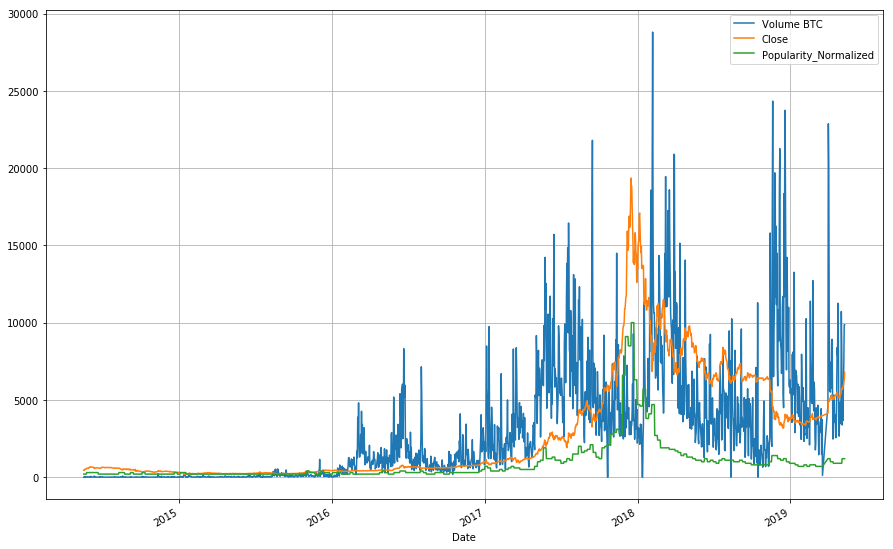

In [47]:
# Plott data
full_data.plot(y=['Volume BTC', 'Close', 'Popularity_Normalized'], x='Date', figsize=(15,10), grid=True)

In [48]:
# Get average closing price, opening price and popularity by year
average_oc_by_year = full_data.copy()
average_oc_by_year['Year'] = pd.DatetimeIndex(average_oc_by_year['Date']).year
average_oc_by_year = average_oc_by_year.groupby(['Year'])[['Open', 'Close', 'Popularity_Normalized']].mean()
average_oc_by_year = average_oc_by_year.reset_index()
average_oc_by_year

,Year,Open,Close,Popularity_Normalized
0,2014,476.601272,476.131184,227.631579
1,2015,271.919808,272.221123,219.178082
2,2016,566.796448,568.263388,276.502732
3,2017,3936.414000,3972.003014,1894.246575
4,2018,7550.822466,7519.481644,1622.191781
5,2019,4246.323529,4272.747899,851.260504


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


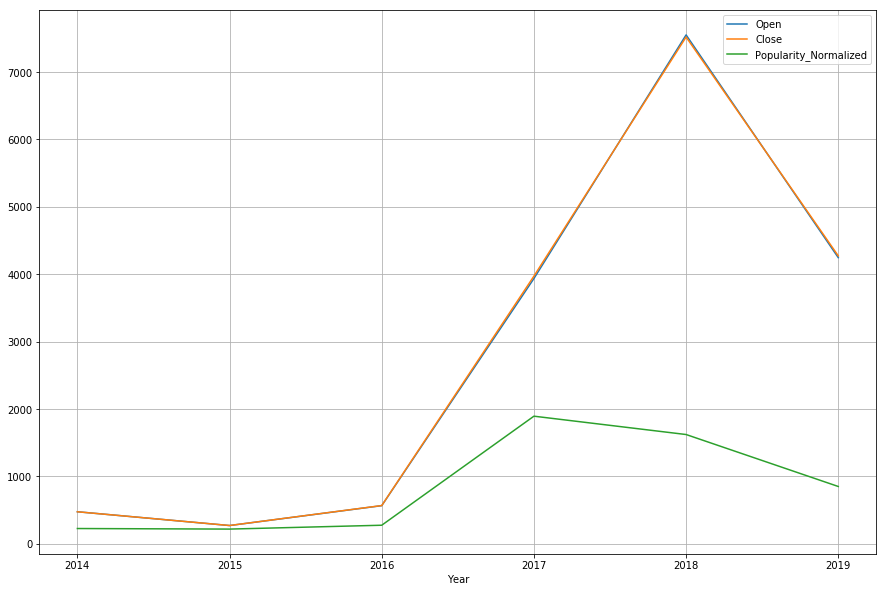

In [49]:
# Plott data
average_oc_by_year.plot(y=['Open', 'Close', 'Popularity_Normalized'], x='Year', figsize=(15,10), grid=True)

In [50]:
# Get average closing price, opening price and popularity by month
average_oc_by_month = full_data.copy()
average_oc_by_month['Month'] = pd.DatetimeIndex(average_oc_by_month['Date']).month
average_oc_by_month = average_oc_by_month.groupby(['Month'])[['Open', 'Close', 'Popularity_Normalized']].mean()
average_oc_by_month = average_oc_by_month.reset_index()
average_oc_by_month

,Month,Open,Close,Popularity_Normalized
0,1,3667.393097,3633.700903,1289.677419
1,2,2924.438936,2930.809007,959.574468
2,3,2875.775524,2852.408462,713.986014
3,4,2986.412533,3011.757667,689.333333
4,5,2764.226107,2771.701074,701.342282
5,6,2178.577800,2173.485067,614.666667
6,7,2227.818065,2238.832258,567.741935
7,8,2380.044710,2384.946065,686.451613
8,9,2403.383000,2397.436800,672.666667
9,10,2595.274065,2607.234194,678.709677


/usr/local/lib/python3.5/dist-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


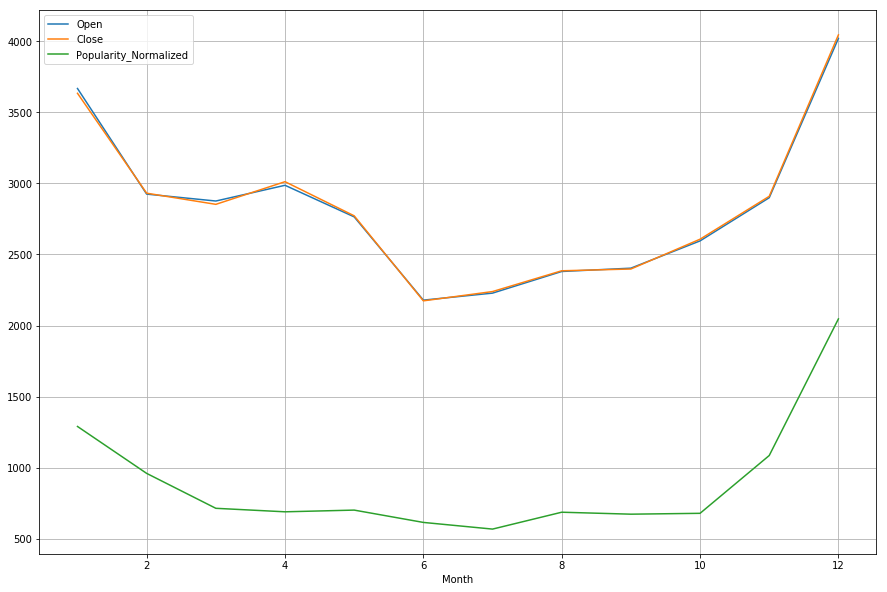

In [51]:
# Plott data
average_oc_by_month.plot(y=['Open', 'Close', 'Popularity_Normalized'], x='Month', figsize=(15,10), grid=True)

In [52]:
# Save combined datasets
full_data.to_csv('bitcoin_research_data_v2.csv', encoding='utf-8')